# WAID - plot image and basic logs

**Created by:** Rewbenio A. Frota

This notebook briefly shows how to load and plot the WAID data.

## Import dependencies

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


## Important functions

* concat_IMG_data() loads image data from multiple files;
* composite_plot() plots a composite log with image and basic logs. The present ```composite_plot()``` procedure to plot a composite log is addapted from [Petrophysics-Python-Series / 14 - Displaying Lithology Data.ipynb](https://github.com/andymcdgeo/Petrophysics-Python-Series/blob/master/14%20-%20Displaying%20Lithology%20Data.ipynb). More details [here](https://towardsdatascience.com/displaying-lithology-data-using-python-and-matplotlib-58b4d251ee7a).

In [2]:
# To load image data from multiple files
def concat_IMG_data(well_id, data_path):
    # Due to file size limitations, the original AMP '.csv' file
    # has been split into several sub-files.
    # The concat_IMG_data() function aims to concatenate
    # them back into a single data object.
    #
    # concat_IMG_data() returns 'image_df', a Pandas dataframe
    # indexed by DEPTH information and whose columns are
    # the azimuthal coordinates of the AMP image log.
    
    # Name of the initial '00' file
    initial_file = well_id + "_AMP00.csv"

    # Read the the initial file to capture header information
    initial_file_path = os.path.join(data_path, initial_file)
    image_df = pd.read_csv(initial_file_path,sep = ';',
                           index_col=0,
                           na_values = -9999,na_filter = True,
                           decimal = ',',
                           skip_blank_lines = True).dropna()

    # Read and add data from the remaining files sequentially
    for file in os.listdir(data_path):
        if file.startswith(well_id) and file != initial_file:
            file_path = os.path.join(data_path, file)
            df_temp = pd.read_csv(file_path,sep = ';',
                                  header=None,index_col = 0,
                                  na_values = -9999, na_filter = True,
                                  decimal = ',', skip_blank_lines = True,
                                  dtype=np.float32
                                 ).dropna()
            
            # Adjust tem df's header to match image header
            df_temp.columns=image_df.columns
            
            # Concat dfs
            image_df = pd.concat([image_df, df_temp])
    return image_df

# To plot composite logs
def composite_plot(depth, gamma, res, dens, neut, dtc, image_df, topdepth, bottomdepth):
    
    fig, ax = plt.subplots(figsize=(8,6), sharey = True)    #, layout="tight")

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    #Set up the plot axes
    ax1 = plt.subplot2grid((1,12), (0,0), rowspan = 1, colspan = 3)
    ax2 = plt.subplot2grid((1,12), (0,3), rowspan = 1, colspan = 3, sharey = ax1)
    ax3 = plt.subplot2grid((1,12), (0,6), rowspan = 1, colspan = 3, sharey = ax1)
    ax4 = ax3.twiny()    #Twins the y-axis for the density track with the neutron track
    ax5 = plt.subplot2grid((1,12), (0,9), rowspan = 3, colspan = 3, sharey = ax1)

    # As our curve scales will be detached from the top of the track,
    # this code adds the top border back in without dealing with splines
    ax10 = ax1.twiny()
    ax10.xaxis.set_visible(False)
    ax11 = ax2.twiny()
    ax11.xaxis.set_visible(False)
    ax12 = ax3.twiny()
    ax12.xaxis.set_visible(False)
    ax15 = ax5.twiny()
    ax15.xaxis.set_visible(False)
    

    # Gamma Ray track
    
    ## Setting up the track and curve
    ax1.plot(gamma, depth, color = "green", linewidth = 0.5)
    ax1.set_xlabel("GR")
    ax1.xaxis.label.set_color("green")
    ax1.set_xlim(0, 60)
    ax1.set_ylabel("Depth (m)", fontweight='bold')
    ax1.tick_params(axis='x', colors="green")
    ax1.spines["top"].set_edgecolor("green")
    ax1.title.set_color('green')
    ax1.set_xticks([0, 60])
    ax1.text(0.02, 1.04, '0', color='green', 
             horizontalalignment='left', transform=ax1.transAxes)
    ax1.text(0.98, 1.04,'60', color='green', 
             horizontalalignment='right', transform=ax1.transAxes)
    ax1.set_xticklabels([])
    
    # Resistivity track
    ax2.plot(res, depth, color = "tab:orange", linewidth = 0.5)
    ax2.set_xlabel("RES")
    ax2.set_xlim(1, 10010)
    ax2.xaxis.label.set_color("tab:orange")
    ax2.tick_params(axis ='x', colors="tab:orange")
    ax2.spines["top"].set_edgecolor("tab:orange")
    ax2.set_xticks([1, 10, 100])
    ax2.semilogx()
    ax2.text(0.02, 1.04, '1', color = 'tab:orange', 
             horizontalalignment = 'left', transform = ax2.transAxes)
    ax2.text(0.98, 1.04, '10000', color = 'tab:orange', 
             horizontalalignment = 'right', transform = ax2.transAxes)
    ax2.set_xticklabels([])
    ax2.tick_params(left = False, labelleft = False)  # remove the ticks and axis label

    
    # Density track
    ax3.plot(dens, depth, color = "red", linewidth = 0.5)
    ax3.set_xlabel("DEN")
    ax3.set_xlim(2, 3)
    ax3.xaxis.label.set_color("red")
    ax3.tick_params(axis='x', colors="red")
    ax3.spines["top"].set_edgecolor("red")
    ax3.set_xticks([2, 2.5, 3])
    ax3.text(0.02, 1.04, '2', color='red', 
             horizontalalignment='left', transform=ax3.transAxes)
    ax3.text(0.98, 1.04, '3', color='red', 
             horizontalalignment='right', transform=ax3.transAxes)
    ax3.set_xticklabels([])
    ax3.tick_params(left = False, labelleft = False)  # remove the ticks and axis label


    # Neutron track placed ontop of density track
    ax4.plot(neut, depth, color = "blue", linewidth = 0.5)
    ax4.set_xlabel('NEU')
    ax4.xaxis.label.set_color("blue")
    ax4.set_xlim(0.45, -0.15)
    ax4.tick_params(axis='x', colors="blue")
    ax4.spines["top"].set_position(("axes", 1.09))
    ax4.spines["top"].set_visible(True)
    ax4.spines["top"].set_edgecolor("blue")
    ax4.set_xticks([0.45,  0.15, -0.15])
    ax4.text(0.02, 1.12, '0.45', color='blue', 
             horizontalalignment = 'left', transform = ax4.transAxes)
    ax4.text(0.98, 1.12, '-0.15', color = 'blue', 
              horizontalalignment = 'right', transform = ax4.transAxes)
    ax4.set_xticklabels([])
    ax4.tick_params(left = False, labelleft = False)  # remove the ticks and axis label
  
    # Adding in neutron density shading
    x1 = dens
    x2 = neut

    x = np.array(ax3.get_xlim())
    z = np.array(ax4.get_xlim())

    nz = ((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)

    # To fill space between the porotisy curves
    ax3.fill_betweenx(depth, x1, nz, where=x1>=nz, interpolate=True, color='green')
    ax3.fill_betweenx(depth, x1, nz, where=x1<=nz, interpolate=True, color='yellow')
    
    
    # Common functions for setting up the plot can be extracted into
    # a for loop. This saves repeating code.
    for ax in [ax1, ax2, ax3, ax5]:
        ax.set_ylim(bottomdepth, topdepth)
        ax.grid(which = 'major', color = 'lightgrey', linestyle = '-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))

    for ax in [ax2, ax3, ax4, ax5]:
        plt.setp(ax.get_yticklabels(), visible = True)
        
    ax5.imshow(image_df,
               extent = [0, len(image_df.columns), bottomdepth, topdepth],
               cmap ="afmhot",
               vmin = np.mean(image_df.values) - np.std(image_df.values),
               vmax = np.mean(image_df.values) + np.std(image_df.values),
               aspect = "auto"
              )
    
    ax5.grid(False)
    ax5.set_xlabel("AMP")
    ax5.set_xlim(0, 180)     #ax5.set_xlim(-1, 181.142)
    ax5.text(0.02, 1.04, '0°', color = 'black', 
             horizontalalignment='left', transform=ax5.transAxes)
    ax5.text(0.99, 1.04, '  360°', color = 'black', 
              horizontalalignment='right', transform=ax5.transAxes)
    ax5.set_xticklabels([])
    ax5.set_xticks([0,  90, 180])
    ax5.tick_params(left = False, labelleft = False)  # remove the ticks and axis label
    
    plt.ticklabel_format(useOffset=True)
    
    # Uncomment to save images
    #plt.savefig('Perfil_composto.eps', dpi=400, format='eps')
    plt.savefig('Perfil_composto.png', dpi=400, format='png')
    #plt.savefig('Perfil_composto.svg', dpi=400, format='svg')
    
    fig.subplots_adjust(wspace = 0)
    plt.show()

## Import data from CSV files

In [3]:
# Location where the AMP image data files are located
img_data_path = r"..\dataset\img"

# Location where the BSC log data files are located
bsc_data_path = r"..\dataset\bsc"

In [4]:
# Well identifier
well_identifier = "antilope37"    #antilope25  tatu22 botorosa47 coala88  antilope37

### Import image log data from CSV files

To load data from multiple ````.CSV```` files, we use the ````concat_IMG_data()```` function.

In [5]:
# Load image data
img_data = concat_IMG_data(well_identifier,img_data_path)

In [6]:
img_data = img_data.iloc[img_data.index > 2174.2009]  #deleting spurious values at the top of the image file
img_data = img_data.iloc[img_data.index <= 2306.4]    #Zone limit @ 2306.4

### Import basic log data from CSV file

In [7]:
# load basic log data
bsc_filename =  well_identifier + '_BSC.csv'
bsc_name = os.path.join(bsc_data_path, bsc_filename)
well = pd.read_csv(bsc_name,
                   index_col = 0,
                   sep = ';', decimal = ',',
                   na_values = -9999, na_filter = True,
                   skip_blank_lines = True
                   ).dropna()

well['DEPTH'] = well.index

In [8]:
# Show dataframe called "well" with basic log data
well

,CAL,DEN,DTC,DTS,GR,NEU,nmrFF,nmrPerm,nmrPhie,nmrPhiT,PE,RES10,RES90,DEPTH
DEPTH,,,,,,,,,,,,,,
2114.0492,12.3281,4.6228,44.1655,90.7925,10.7994,0.1470,0.0400,6.552053e+08,0.0400,0.0400,5.5378,1950.0000,13.3277,2114.0492
2114.2016,12.3282,4.6210,45.5622,90.4684,10.8977,0.1348,0.0400,6.552053e+08,0.0400,0.0400,5.7286,1950.0000,10.2807,2114.2016
2114.3540,12.3317,4.6114,47.2579,91.1138,11.4756,0.1098,0.0400,6.552053e+08,0.0400,0.0400,5.8262,1813.0947,7.2811,2114.3540
2114.5064,12.3425,4.6242,50.2750,93.4001,11.6808,0.0877,0.0400,6.552053e+08,0.0400,0.0400,5.7898,315.4579,5.4897,2114.5064
2114.6588,12.3590,4.6172,53.2660,96.6820,11.3531,0.0712,0.0400,6.552053e+08,0.0400,0.0400,5.6661,76.8490,4.1488,2114.6588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354.8412,12.3187,2.4762,69.5665,126.6226,31.5882,0.2299,0.0539,1.765000e+00,0.1424,0.1648,7.5075,509.9236,302.1508,2354.8412
2354.9936,12.3322,2.4489,70.7097,128.0167,27.2338,0.2059,0.0640,3.210000e+00,0.1479,0.1752,7.4053,163.0584,149.1939,2354.9936
2355.1460,12.3170,2.3498,71.5004,127.7266,29.2179,0.2027,0.0772,6.001100e+00,0.1527,0.1825,7.2151,101.3160,84.5721,2355.1460


## Plot entire well (as defined by basic log depth limits)

In [9]:
intv_top = min(well['DEPTH'])    # top depth of basic log data
intv_bot = max(well['DEPTH'])    # depth of basic log data

# Slice de image dataframe accordingly
data_intv = img_data.loc[img_data.index >= intv_top]
data_intv = data_intv.loc[data_intv.index <= intv_bot]

In [10]:
# Show the sliced dataframe
data_intv

,IMG_AMP[0],IMG_AMP[1],IMG_AMP[2],IMG_AMP[3],IMG_AMP[4],IMG_AMP[5],IMG_AMP[6],IMG_AMP[7],IMG_AMP[8],IMG_AMP[9],...,IMG_AMP[170],IMG_AMP[171],IMG_AMP[172],IMG_AMP[173],IMG_AMP[174],IMG_AMP[175],IMG_AMP[176],IMG_AMP[177],IMG_AMP[178],IMG_AMP[179]
2174.205078,29.365227,29.449867,29.547564,29.805876,29.780735,29.683481,29.646023,29.608120,29.557583,29.445763,...,29.159138,29.279627,29.398756,29.464581,29.419538,29.386282,29.427307,29.379482,29.331985,29.342464
2174.210205,29.436003,29.467180,29.461609,29.624941,29.655079,29.627684,29.593618,29.527197,29.465940,29.387550,...,29.139971,29.255678,29.321301,29.402439,29.349737,29.292883,29.335707,29.333187,29.326389,29.366285
2174.215088,29.506634,29.484413,29.375835,29.444462,29.529713,29.571985,29.541302,29.446436,29.374489,29.329443,...,29.120811,29.231749,29.243944,29.340387,29.280046,29.199629,29.244255,29.286963,29.320768,29.390034
2174.220215,29.643785,29.677650,29.722010,29.710033,29.696356,29.727558,29.665461,29.662836,29.626209,29.691132,...,29.716125,29.747883,29.785141,29.721701,29.561787,29.547913,29.484995,29.502346,29.491663,29.588633
2174.225342,29.624128,29.695494,29.736418,29.669218,29.703997,29.728115,29.690676,29.759941,29.713205,29.678131,...,29.648800,29.664858,29.706390,29.672276,29.555271,29.505054,29.437580,29.476103,29.467995,29.508476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306.376465,30.208895,30.328455,30.058512,30.129820,29.974552,30.129099,30.133940,30.202314,30.140551,30.041353,...,28.162622,28.492085,28.717278,28.558134,28.656275,28.945621,29.068245,29.503641,29.856167,29.954420
2306.381592,29.968061,29.911921,30.213840,30.070204,30.046394,29.954748,29.966867,29.815887,29.994961,30.235449,...,28.142361,28.052658,27.794525,28.071161,28.241041,28.669182,28.855820,29.540920,29.797161,29.701960
2306.386719,29.540962,29.475969,29.294329,28.841103,28.864380,29.233633,29.392742,29.688566,29.940519,30.368612,...,29.123440,29.219694,29.000254,28.735174,28.513041,28.448462,28.605305,28.158625,28.366014,29.350897
2306.391602,29.741816,29.591633,29.452147,29.068701,28.922344,28.928883,29.028734,29.272327,29.055010,29.094324,...,28.858677,28.946312,28.913696,29.095993,28.876535,28.769670,28.676281,28.358047,28.499353,29.658989


### Plot composite logs (basic + image logs) covering all basic log data

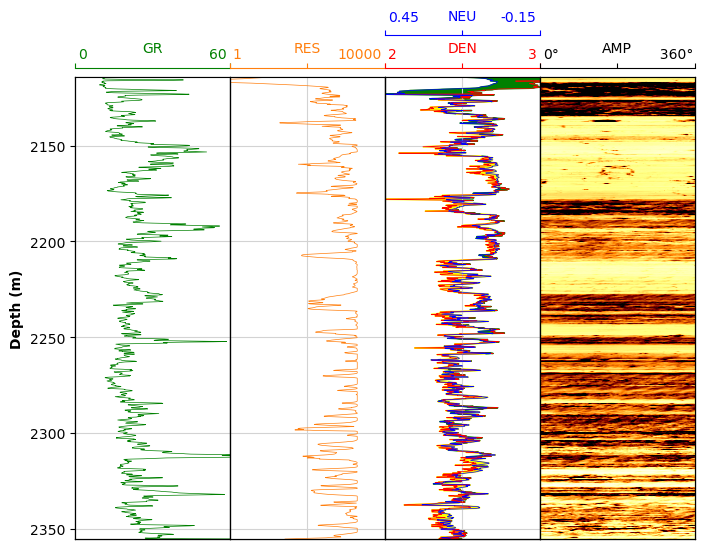

In [11]:
composite_plot(well['DEPTH'], well['GR'], well['RES90'], well['DEN'], well['NEU'], well['DTC'], data_intv, intv_top, intv_bot)

## Zoom to an abritrary depth interval (zoom)

In [12]:
# Define a "zoomed" depth interval to plot

intv_top = 2177.4476    # top of the interval to plot
intv_bot = 2186.9152    # bottom of the interval to plot

# Define a slice of img_data dataframe with selected image data in the interval [intv_top, intv_bot]
data_intv = img_data.loc[img_data.index >= intv_top]
data_intv = data_intv.loc[data_intv.index <= intv_bot]

### Plot composite logs (basic + image logs) in zoomed interval

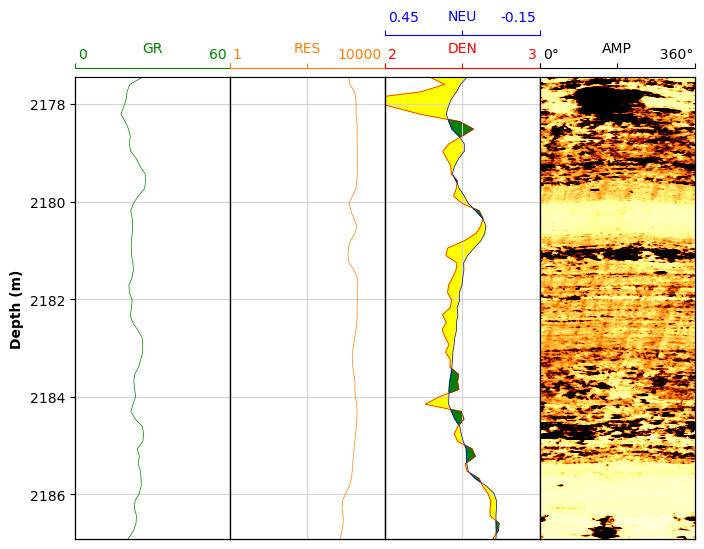

In [13]:
composite_plot(well['DEPTH'], well['GR'], well['RES90'], well['DEN'], well['NEU'], well['DTC'], data_intv, intv_top, intv_bot)